In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import torch 
import model
import glob 
import scipy 

In [18]:
N = 100
dt = 0.0001
T = 10
w_in = 50 * 10**-12

fs = np.linspace(0.1,5,5)

    

In [21]:
f1 = fs[0]
spikes1 = model.run(N,f1,dt,T,w_in)

100%|██████████| 99999/99999 [31:09<00:00, 53.50it/s]


In [22]:
f2 = fs[1]
spikes2 = model.run(N,f2,dt,T,w_in)

100%|██████████| 99999/99999 [31:06<00:00, 53.58it/s]


In [23]:
f3 = fs[2]
spikes3 = model.run(N,f3,dt,T,w_in)

100%|██████████| 99999/99999 [31:13<00:00, 53.36it/s]


In [24]:
f4 = fs[3]
spikes4 = model.run(N,f4,dt,T,w_in)

100%|██████████| 99999/99999 [31:06<00:00, 53.58it/s]


In [19]:
f5 = fs[4]
spikes5 = model.run(N,f5,dt,T,w_in)

100%|██████████| 99999/99999 [31:21<00:00, 53.16it/s]


# Load datas

In [43]:
w_in_list =[]
fs_list = []
for add in glob.glob("./data0/*.pt"):
    if add.split("_")[3] == "50.0.pt":
        fs_list.append(add)
    else:
        w_in_list.append(add)


In [44]:
N_values = [i for i in range(300,1100,100)]
Ns = [[],[],[],[],[],[],[],[]]
for add in glob.glob("./data/*.pt"):
    Ns[N_values.index(int(add.split("_")[0].split("/")[2]))].append(add)

In [115]:
spikes = torch.load(Ns[-1][0]).type(torch.float64)
spikes


tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0', dtype=torch.float64)

num spikes :  tensor(193821.)


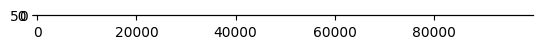

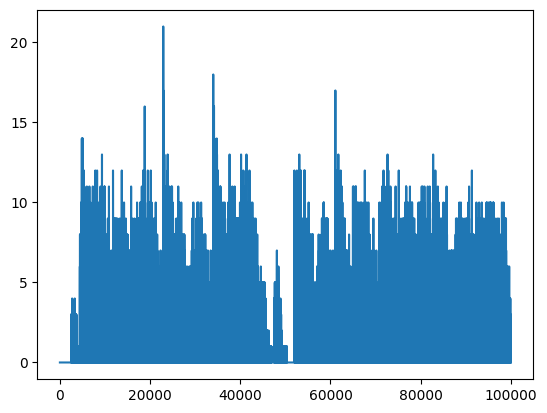

tensor(1.9382)


In [29]:
spikes = spikes1

print("num spikes : ", torch.sum(spikes).cpu())
time_steps = spikes.shape[1]

plt.imshow(spikes[:,:].cpu())
plt.show()
plt.plot(torch.arange(time_steps)[:],spikes.sum(0)[:].cpu())
plt.show()
print(spikes.sum(0).mean().cpu())



-2.2304482654638447
-2.001962710480411
-2.1852800149550364
-1.9377469135353318


/tmp/ipykernel_95719/1773937389.py:30: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(70*np.arange(70)),np.log(1000*np.arange(70)**-1.5))
/tmp/ipykernel_95719/1773937389.py:30: RuntimeWarning: divide by zero encountered in power
  plt.plot(np.log(70*np.arange(70)),np.log(1000*np.arange(70)**-1.5))


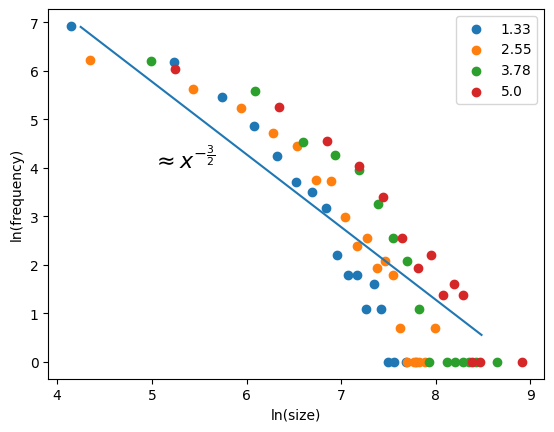

In [99]:
for spikes in [spikes2,spikes3,spikes4,spikes5]:

    avalanch = spikes.sum(0) != 0
    slippingR = avalanch.roll(+1)
    slippingL = avalanch.roll(-1)
    slippingR[0] = False
    slippingL[-1] = False

    ends  = torch.logical_xor( avalanch ,(avalanch *slippingL))
    starts  = torch.logical_xor( avalanch ,(avalanch *slippingR))

    spikes_sum = torch.cumsum(spikes.sum(dim = 0),dim = 0)

    avalanches_size = spikes_sum[torch.where(ends)[0]] - spikes_sum[torch.where(starts)[0]] + 1

    # nbins = 20
    # bins = np.exp(np.linspace(np.log(avalanches_size.cpu().min()), np.log(avalanches_size.cpu().max()) , nbins))
    bins = 20
    freq,size = np.histogram(avalanches_size.cpu(),bins = bins)
    size = (size[:-1] + size[1:])/2

    slope , intercept, rvalue ,_,_= scipy.stats.linregress(np.log(size[freq != 0]),np.log(freq[freq != 0]))
    print(slope)



    plt.scatter(np.log(size[freq != 0]),np.log(freq[freq != 0]))
    # plt.plot([np.log(size[freq != 0])[0],np.log(size[freq != 0][-1])],[intercept,intercept + slope * np.log(size[freq != 0][-1])])
plt.text(5,4,"$\\approx  x^{-\\frac{3}{2}}$",fontsize = 16)
plt.plot(np.log(70*np.arange(70)),np.log(1000*np.arange(70)**-1.5))
plt.legend(np.round(fs[1:],2))
plt.xlabel("ln(size)")
plt.ylabel("ln(frequency)")
plt.show()



-2.1573705148068973
-1.962637606332324
-2.1883379580302424
-1.9346605481316723


/tmp/ipykernel_95719/2362610036.py:31: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(30*np.arange(40)),np.log(1000*np.arange(40)**-2.0))
/tmp/ipykernel_95719/2362610036.py:31: RuntimeWarning: divide by zero encountered in power
  plt.plot(np.log(30*np.arange(40)),np.log(1000*np.arange(40)**-2.0))


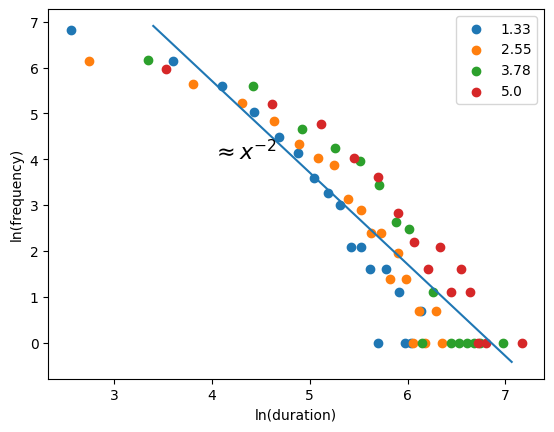

In [98]:
for spikes in [spikes2,spikes3,spikes4,spikes5]:

    avalanch = spikes.sum(0) != 0
    slippingR = avalanch.roll(+1)
    slippingL = avalanch.roll(-1)
    slippingR[0] = False
    slippingL[-1] = False

    ends  = torch.logical_xor( avalanch ,(avalanch *slippingL))
    starts  = torch.logical_xor( avalanch ,(avalanch *slippingR))

    avalanches_steps = torch.where(ends) [0] -   torch.where(starts)[0] + 1


    # nbins = 10
    # bins = np.exp(np.linspace(np.log(avalanches_size.cpu().min()), np.log(avalanches_size.cpu().max()) , nbins))
    bins = 20
    freq,size = np.histogram(avalanches_steps.cpu(),bins =bins)
    size = (size[:-1] + size[1:])/2


    slope , intercept, rvalue ,_,_= scipy.stats.linregress(np.log(size[freq != 0]),np.log(freq[freq != 0]))
    print(slope)


    plt.scatter(np.log(size[freq != 0]),np.log(freq[freq != 0]))
    # plt.plot([np.log(size[freq != 0])[0],np.log(size[freq != 0][-1])],[intercept,intercept + slope * np.log(size[freq != 0][-1])])
    # plt.text(6,4,f"slope = {np.round(slope,3)}")


plt.plot(np.log(30*np.arange(40)),np.log(1000*np.arange(40)**-2.0))
plt.text(4,4,"$\\approx x^{-2}$",fontsize = 16)
plt.legend(np.round(fs[1:],2))
plt.xlabel("ln(duration)")
plt.ylabel("ln(frequency)")

plt.show()


